In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
%matplotlib inline

In [47]:
directory1='프로젝트 파일\\2021 지역사회조사(60세 이상) 수정\\'
directory2='프로젝트 파일\\202106 노인기초연금 수급 현황\\'
directory3='프로젝트 파일\\고령자 고용정보\\'
directory4='프로젝트 파일\\고령자 인구\\'
directory5='프로젝트 파일\\독거노인 현황\\'
directory6='프로젝트 파일\\사회적 신뢰도\\'
directory7='프로젝트 파일\\일반수급자 현황\\'
directory8='프로젝트 파일\\요인 구하기 위한 데이터셋폴더\\'
directory9='프로젝트 파일\\노인관련데이터(21~20)\\'

In [48]:
#일자리 만족도
data1=pd.DataFrame(pd.read_csv(directory1+"60세 이상 일자리 만족도.csv")[['GU','BQ6']])
data2=pd.read_csv(directory8+"2021_노인_구직건수_및_취업건수.csv",encoding='cp949')

In [49]:
def GU(x):
    div=''
    if x==110:
        div='종로구'
    elif x==140:
        div='중구'
    elif x==170:
        div='용산구'
    elif x==200:
        div='성동구'
    elif x==215:
        div='광진구'
    elif x==230:
        div='동대문구'
    elif x==260:
        div='중랑구'
    elif x==290:
        div='성북구'
    elif x==305:
        div='강북구'
    elif x==320:
        div='도봉구'
    elif x==350:
        div='노원구'
    elif x==380:
        div='은평구'
    elif x==410:
        div='서대문구'
    elif x==440:
        div='마포구'
    elif x==470:
        div='양천구'
    elif x==500:
        div='강서구'
    elif x==530:
        div='구로구'
    elif x==545:
        div='금천구'
    elif x==560:
        div='영등포구'
    elif x==590:
        div='동작구'
    elif x==620:
        div='관악구'
    elif x==650:
        div='서초구'
    elif x==680:
        div='강남구'
    elif x==710:
        div='송파구'
    else:
        div='강동구'
    return div
#data1['GU']=data1['GU'].apply(lambda x: GU(x))

In [50]:
satis=data1.groupby('GU')['BQ6'].mean().reset_index().sort_values(by='GU')

In [51]:
data2=data2.rename(columns={'Unnamed: 0':'시군구','구직건수(월)':'구직건수','취업건수(월)':'취업건수'}).sort_values(by='시군구').reset_index(drop=True)

In [52]:
data3=pd.concat([data2,satis],axis=1).drop('GU',axis=1)

In [53]:
import re
for i in range(len(data3)):
    data3['구직건수'][i]=re.sub(',','',data3['구직건수'][i])

C:\Users\user\AppData\Local\Temp\ipykernel_12164\3880227114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['구직건수'][i]=re.sub(',','',data3['구직건수'][i])


In [54]:
for i in range(len(data3)):
    data3['취업건수'][i]=re.sub(',','',data3['취업건수'][i])

C:\Users\user\AppData\Local\Temp\ipykernel_12164\2698831471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['취업건수'][i]=re.sub(',','',data3['취업건수'][i])


In [55]:
for i in range(len(data3)):
    data3['구인난'][i]=re.sub(',','',data3['구인난'][i])

C:\Users\user\AppData\Local\Temp\ipykernel_12164\2482211768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['구인난'][i]=re.sub(',','',data3['구인난'][i])


In [56]:
data3['취업건수']=data3['취업건수'].astype(int)
data3['구직건수']=data3['구직건수'].astype(int)
data3['구인난']=data3['구인난'].astype(int)
data3['노인취업률']=data3['취업건수']/data3['구직건수']

In [57]:
#일자리지표
cor1=data3.set_index('시군구').corr()

In [58]:
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
def corhmap(cor):
    mask=np.zeros_like(cor, dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True

    figure, ax=plt.subplots()
    figure.set_size_inches(20,10)
    sns.heatmap(cor, mask=mask,vmin=-1, vmax=1, square=True, annot=True)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12164\644547611.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(cor, dtype=np.bool)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


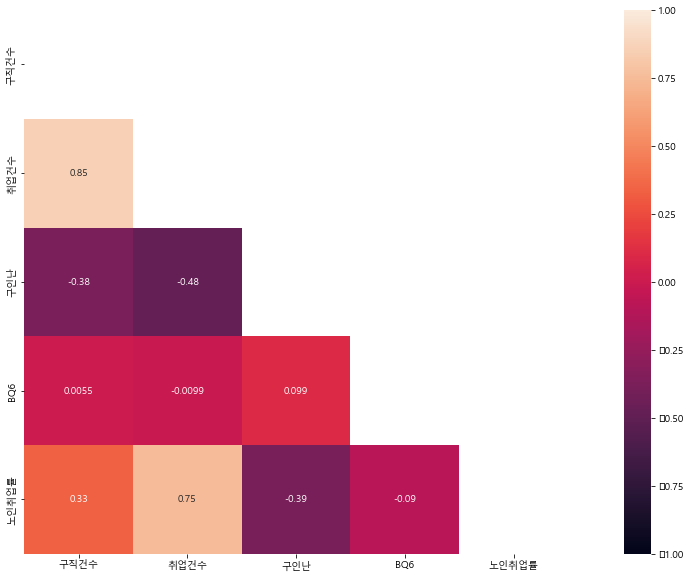

In [59]:
corhmap(cor1)

In [62]:
data4=data3.set_index('시군구')

In [63]:
from scipy.stats import pearsonr

for i in data4.columns:
    for j in data4.columns:
        stat,pvalue=pearsonr(data4[i],data4[j])
        print(i,'와 ',j,'의 상관계수 :',stat )
        print(i,'와 ',j,'의 pvalue :',pvalue )
        print('\n')

구직건수 와  구직건수 의 상관계수 : 1.0
구직건수 와  구직건수 의 pvalue : 0.0


구직건수 와  취업건수 의 상관계수 : 0.852729294945141
구직건수 와  취업건수 의 pvalue : 6.200305802902114e-08


구직건수 와  구인난 의 상관계수 : -0.3826208922105434
구직건수 와  구인난 의 pvalue : 0.059064115980431306


구직건수 와  BQ6 의 상관계수 : 0.005496655393512351
구직건수 와  BQ6 의 pvalue : 0.9791964496680338


구직건수 와  노인취업률 의 상관계수 : 0.3309867587201095
구직건수 와  노인취업률 의 pvalue : 0.10606475307935692


취업건수 와  구직건수 의 상관계수 : 0.852729294945141
취업건수 와  구직건수 의 pvalue : 6.200305802902114e-08


취업건수 와  취업건수 의 상관계수 : 1.0
취업건수 와  취업건수 의 pvalue : 0.0


취업건수 와  구인난 의 상관계수 : -0.48013330067513277
취업건수 와  구인난 의 pvalue : 0.015137015717534227


취업건수 와  BQ6 의 상관계수 : -0.009936138406742803
취업건수 와  BQ6 의 pvalue : 0.9624030640860483


취업건수 와  노인취업률 의 상관계수 : 0.7503114913039989
취업건수 와  노인취업률 의 pvalue : 1.5645433070778982e-05


구인난 와  구직건수 의 상관계수 : -0.3826208922105434
구인난 와  구직건수 의 pvalue : 0.059064115980431306


구인난 와  취업건수 의 상관계수 : -0.48013330067513277
구인난 와  취업건수 의 pvalue : 0.015137015717534227


구인난 와  구

In [ ]:
from 

In [1]:
total=0.042-0.077+0.25-0.24
구직건수=0.042/total
취업건수=-0.077/total
구인난=0.25/total
노인취업률=-0.24/total

In [4]:
[구직건수,취업건수,구인난,노인취업률]

[-1.6800000000000004,
 3.0800000000000005,
 -10.000000000000002,
 9.600000000000001]

In [43]:
data3.corr()['BQ6']

구직건수     0.041645
취업건수    -0.077009
구인난      0.249195
BQ6      1.000000
노인취업률   -0.236963
Name: BQ6, dtype: float64

In [44]:
data3['구직건수']

0     1769
1     2390
2     1731
3     4145
4     2631
5     2120
6     3936
7     1666
8     3300
9     2801
10    1795
11    3375
12    1932
13    2050
14    1547
15    1636
16    2091
17    3038
18    2075
19    1641
20     929
21    3684
22     482
23     589
24    2929
Name: 구직건수, dtype: int32

In [51]:
#save=((-1.68*scaler['구직건수'])+3.08*scaler['취업건수']+(-10*scaler['구인난'])+9.6*scaler['노인취업률']).reset_index().rename(columns={0:'일자리지수'})
#save.to_csv("구역별 일자리지수.csv",index=False,encoding='cp949')

In [41]:
data3

,시군구,구직건수,취업건수,구인난,BQ6,노인취업률
0,강남구,1769,553,39034,3.061047,0.312606
1,강동구,2390,664,70,2.771117,0.277824
2,강북구,1731,497,-4256,3.124324,0.287117
3,강서구,4145,2002,-493,3.045952,0.482992
4,관악구,2631,1009,-11204,3.093897,0.383504
5,광진구,2120,708,-2130,2.804560,0.333962
6,구로구,3936,1348,3689,2.962162,0.342480
7,금천구,1666,633,9645,3.045570,0.379952
8,노원구,3300,2110,-6454,3.061728,0.639394
9,도봉구,2801,1461,-4579,2.865031,0.521599


In [28]:
data4=data3.set_index('시군구')

In [32]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
scaler=std.fit_transform(data4)
scaler=pd.DataFrame(scaler,columns=data4.columns,index=data4.index)

In [35]:
from statsmodels.formula.api import ols
model=ols('BQ6~구직건수+취업건수+구인난+노인취업률',scaler).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BQ6   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.8140
Date:                Thu, 11 Aug 2022   Prob (F-statistic):              0.531
Time:                        09:03:47   Log-Likelihood:                -33.588
No. Observations:                  25   AIC:                             77.18
Df Residuals:                      20   BIC:                             83.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.136e-15      0.207   1.51e-14      1.000      -0.433       0.433
구직건수          -0.3868      0.888     -0.436      0.668      -2.239       1.465
취업건수           0.8799      1.275      0.690      0.498      -1.779       3.539
구인난            0.2649      0.237      1.118      0.277      -0.229       0.759
노인취업률         -0.6662      0.701     -0.950      0.353      -2.129       0.796
==============================================================================
Omnibus:                        2.270   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.589
Skew:                          -0.409   Prob(JB):                        0.452
Kurtosis:                       2.074   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     25 non-null     object 
 1   구직건수    25 non-null     int32  
 2   취업건수    25 non-null     int32  
 3   구인난     25 non-null     int32  
 4   BQ6     25 non-null     float64
 5   노인취업률   25 non-null     float64
dtypes: float64(2), int32(3), object(1)
memory usage: 1.0+ KB


,시군구,구직건수,취업건수,구인난,BQ6,노인취업률
0,강남구,1769,553,39034,3.061047,0.312606
1,강동구,2390,664,70,2.771117,0.277824
2,강북구,1731,497,-4256,3.124324,0.287117
3,강서구,4145,2002,-493,3.045952,0.482992
4,관악구,2631,1009,-11204,3.093897,0.383504
5,광진구,2120,708,-2130,2.804560,0.333962
6,구로구,3936,1348,3689,2.962162,0.342480
7,금천구,1666,633,9645,3.045570,0.379952
8,노원구,3300,2110,-6454,3.061728,0.639394
9,도봉구,2801,1461,-4579,2.865031,0.521599


In [7]:
data=pd.read_csv(directory2+"202106 노인기초인구 수급 현황.csv",encoding='cp949')[['자치구','기초연금 수급자 수']]
data2=pd.read_excel(directory2+"국민기초생활보장(노인인구)일반수급자(구별).xlsx")
data3=pd.read_csv(directory8+"주택연금 서울 발급건.csv",encoding='cp949')
data4=pd.read_csv(directory9+'기초연금+수급자+현황_20220811102728.csv',encoding='cp949',sep='\t')

In [10]:
data2

,2021,기초생활보장 수급자 수
0,종로구,2253
1,중구,2753
2,용산구,3408
3,성동구,4193
4,광진구,4178
5,동대문구,6761
6,중랑구,9736
7,성북구,6353
8,강북구,8502
9,도봉구,5371


In [6]:
data=data.sort_values(by='자치구').reset_index(drop=True)
data2=data2.sort_values(by=2021).reset_index(drop=True)
data3=data3.sort_values(by='구분').reset_index(drop=True)
#data4=data4.sort_values(by='자치구별(2)').reset_index(drop=True)

df=pd.concat([data,data2,data3,data4],axis=1).drop([2021,'구분','자치구별(2)','공급건 비율','평균 월지급금 천원','평균 주택가격 백만원','노인인구수 (명)','수급률 (%)','수급자수 (명)'],axis=1)
df=df.rename(columns={'기초연금 수급자 수':'기초연금수급자수','기초생활보장 수급자 수':'기초생활보장수급자수','공급건 건수':'주택연금건수'}).set_index('자치구')


NameError: name 'scaler' is not defined

In [8]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaler=std.fit_transform(df)
scaler=pd.DataFrame(scaler,columns=df.columns,index=df.index)
scaler

,기초연금수급자수,기초생활보장수급자수,주택연금건수
자치구,,,
강남구,-1.077745,-0.030773,-0.977418
강동구,0.170459,-0.037324,0.390932
강북구,0.878979,0.856826,-0.349536
강서구,1.642895,2.392565,1.408535
관악구,0.923719,0.833171,0.012038
광진구,-0.651877,-0.716761,-0.786888
구로구,0.609703,-0.304804,0.566306
금천구,-0.666917,-0.502048,-0.968757
노원구,1.777192,2.518117,3.084331


In [9]:
cor1=scaler.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3820\644547611.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(cor, dtype=np.bool)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


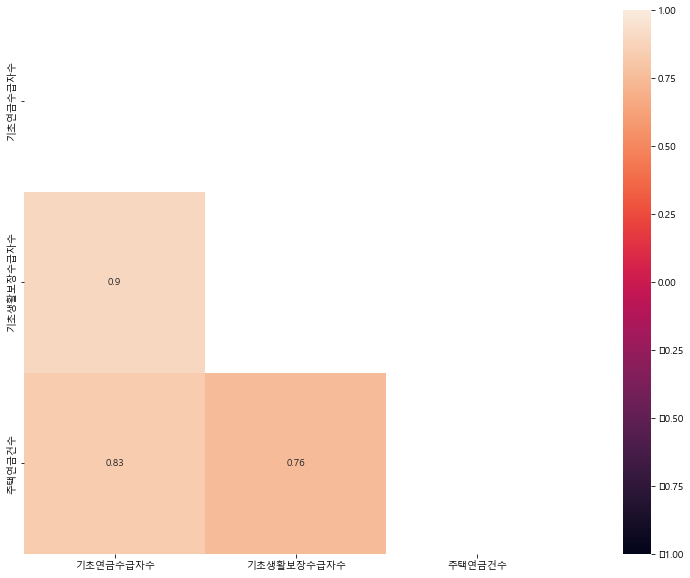

In [13]:
corhmap(cor1)

In [11]:
from scipy.stats import pearsonr

for i in df.columns:
    for j in df.columns:
        stat,pvalue=pearsonr(df[i],df[j])
        print(i,'와 ',j,'의 상관계수 :',stat )
        print(i,'와 ',j,'의 pvalue :',pvalue )
        print('\n')

기초연금수급자수 와  기초연금수급자수 의 상관계수 : 1.0
기초연금수급자수 와  기초연금수급자수 의 pvalue : 0.0


기초연금수급자수 와  기초생활보장수급자수 의 상관계수 : 0.895511279291151
기초연금수급자수 와  기초생활보장수급자수 의 pvalue : 1.4901838931859892e-09


기초연금수급자수 와  주택연금건수 의 상관계수 : 0.8284174083462251
기초연금수급자수 와  주택연금건수 의 pvalue : 3.1679829483619223e-07


기초생활보장수급자수 와  기초연금수급자수 의 상관계수 : 0.895511279291151
기초생활보장수급자수 와  기초연금수급자수 의 pvalue : 1.4901838931859892e-09


기초생활보장수급자수 와  기초생활보장수급자수 의 상관계수 : 1.0
기초생활보장수급자수 와  기초생활보장수급자수 의 pvalue : 0.0


기초생활보장수급자수 와  주택연금건수 의 상관계수 : 0.7562152492737015
기초생활보장수급자수 와  주택연금건수 의 pvalue : 1.2266390592159472e-05


주택연금건수 와  기초연금수급자수 의 상관계수 : 0.8284174083462251
주택연금건수 와  기초연금수급자수 의 pvalue : 3.1679829483619223e-07


주택연금건수 와  기초생활보장수급자수 의 상관계수 : 0.7562152492737015
주택연금건수 와  기초생활보장수급자수 의 pvalue : 1.2266390592159472e-05


주택연금건수 와  주택연금건수 의 상관계수 : 1.0
주택연금건수 와  주택연금건수 의 pvalue : 0.0




In [133]:
cor1['기초생활보장수급자수']

기초연금수급자수      0.895511
기초생활보장수급자수    1.000000
주택연금건수        0.756215
Name: 기초생활보장수급자수, dtype: float64

In [5]:
total=0.895511+0.756215

기초연금=0.895511/total
주택연금=0.756215/total

In [6]:
[기초연금,주택연금]

[0.5421668000624801, 0.45783319993751986]

In [138]:
save=(기초연금*scaler['기초연금수급자수']+주택연금*scaler['주택연금건수']).reset_index().rename(columns={0:'연금지수'})
save.to_csv("구역별 연금지수.csv",encoding='cp949',index=False)

In [173]:
#인구학적 특성
data=pd.read_excel(directory5+"독거노인 통계.xlsx")[['행정구별','소계']]
data2=pd.read_csv('노인전처리.csv',encoding='cp949')[['자치구','65세 이상 내국인']].sort_values(by='자치구').reset_index(drop=True)
data3=pd.read_csv(directory9+'2021_여성노인인구수.csv',encoding='cp949').sort_values(by='자치구별').reset_index(drop=True)
data4=pd.read_csv(directory9+'2021노령화지수.csv',encoding='cp949').sort_values(by='행정구별').reset_index(drop=True)

In [6]:
gagu=pd.read_csv(directory1+'60세 이상 설문자의 개인 정보.csv',encoding='cp949')[['GU','FAM1']]
gagu['GU']=gagu['GU'].apply(lambda x: GU(x))

In [7]:
gagu=gagu.groupby('GU')['FAM1'].mean().reset_index()

In [9]:
#gagu.to_csv('구역별 가구원수 평균.csv',index=False,encoding='cp949')

In [184]:
df=pd.concat([data,data2,data3,data4,gagu],axis=1).drop(['자치구','GU','행정구별'],axis=1)

In [189]:
df=df.rename(columns={'소계':'독거노인수','65세 이상 내국인':'내국인노인수','FAM1':'가구원수평균'}).set_index('자치구별')

In [207]:
for i in range(len(df)):
    df['독거노인수'][i]=re.sub(',','',df['독거노인수'][i])
df['독거노인수']=df['독거노인수'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_6844\1151988614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['독거노인수'][i]=re.sub(',','',df['독거노인수'][i])


In [239]:
cor1=scaler.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_6844\644547611.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(cor, dtype=np.bool)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


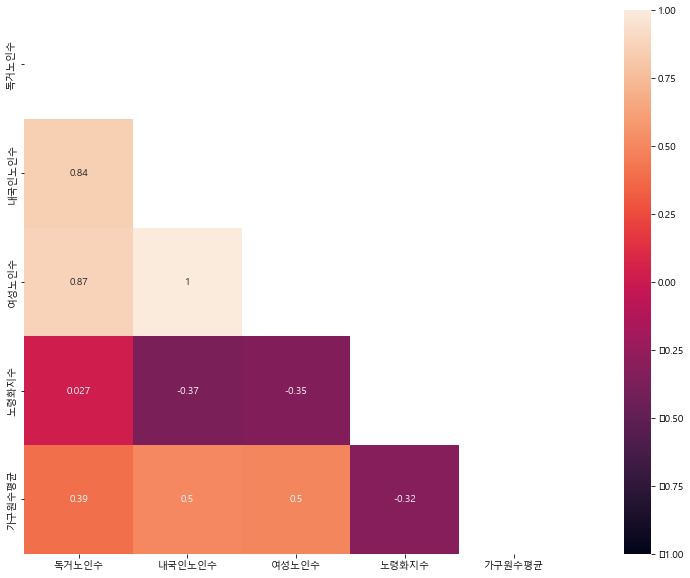

In [240]:
corhmap(cor1)

In [241]:
from scipy.stats import pearsonr

for i in df.columns:
    for j in df.columns:
        stat,pvalue=pearsonr(df[i],df[j])
        print(i,'와 ',j,'의 상관계수 :',stat )
        print(i,'와 ',j,'의 pvalue :',pvalue )
        print('\n')

독거노인수 와  독거노인수 의 상관계수 : 1.0
독거노인수 와  독거노인수 의 pvalue : 0.0


독거노인수 와  내국인노인수 의 상관계수 : 0.8440995448091497
독거노인수 와  내국인노인수 의 pvalue : 1.1414598290451073e-07


독거노인수 와  여성노인수 의 상관계수 : 0.868270914749157
독거노인수 와  여성노인수 의 pvalue : 1.862466648917919e-08


독거노인수 와  노령화지수 의 상관계수 : 0.027455780542534836
독거노인수 와  노령화지수 의 pvalue : 0.8963489306789187


독거노인수 와  가구원수평균 의 상관계수 : 0.3947583611797813
독거노인수 와  가구원수평균 의 pvalue : 0.0508327285806887


내국인노인수 와  독거노인수 의 상관계수 : 0.8440995448091497
내국인노인수 와  독거노인수 의 pvalue : 1.1414598290451073e-07


내국인노인수 와  내국인노인수 의 상관계수 : 1.0
내국인노인수 와  내국인노인수 의 pvalue : 0.0


내국인노인수 와  여성노인수 의 상관계수 : 0.9961085228760014
내국인노인수 와  여성노인수 의 pvalue : 9.043753840382643e-26


내국인노인수 와  노령화지수 의 상관계수 : -0.37151161310666403
내국인노인수 와  노령화지수 의 pvalue : 0.06746942166852306


내국인노인수 와  가구원수평균 의 상관계수 : 0.5033439316378089
내국인노인수 와  가구원수평균 의 pvalue : 0.010319489798398107


여성노인수 와  독거노인수 의 상관계수 : 0.868270914749157
여성노인수 와  독거노인수 의 pvalue : 1.862466648917919e-08


여성노인수 와  내국인노인수 의 상관계수 : 0.996

In [222]:
std=StandardScaler()
scaler=std.fit_transform(df)
scaler=pd.DataFrame(scaler,columns=df.columns,index=df.index)

In [243]:
total=0.844+0.868+0.395
내국인노인수=0.844/total
여성노인수=0.868/total
가구원수평균=0.395/total


[0.4005695301376364, 0.4119601328903654, 0.18747033697199808]

In [249]:
save=(내국인노인수*scaler['내국인노인수']+여성노인수*scaler['여성노인수']+가구원수평균*scaler['가구원수평균']).reset_index().rename(columns={0:'인구학적 특성지표'})
save.to_csv('구역별 인구학적 특성.csv',encoding='cp949',index=False)

In [245]:
scaler

,독거노인수,내국인노인수,여성노인수,노령화지수,가구원수평균
자치구별,,,,,
강남구,-0.277132,0.776252,0.706674,-1.438218,-0.380881
강동구,-0.019564,0.578090,0.452105,-1.065302,0.594649
강북구,0.642116,-0.006279,0.090344,2.179800,0.861007
강서구,1.644764,1.532500,1.553657,-0.502225,0.509019
관악구,1.763682,0.799927,0.813188,1.554982,-0.743311
광진구,-0.853043,-0.658179,-0.693699,-0.228096,-0.401404
구로구,0.073308,0.397189,0.330485,-0.210808,-0.234402
금천구,-1.164282,-1.240827,-1.320487,0.772107,0.216844
노원구,1.908383,1.285945,1.482195,-0.403440,1.084440


In [224]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

model=ols('독거노인수~내국인노인수+여성노인수+노령화지수+가구원수평균',scaler)

In [225]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,내국인노인수,141.139011
1,여성노인수,138.518464
2,노령화지수,1.284995
3,가구원수평균,1.380230


In [235]:
model=ols('독거노인수~노령화지수+가구원수평균',scaler).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  독거노인수   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2.459
Date:                Thu, 11 Aug 2022   Prob (F-statistic):              0.109
Time:                        14:25:42   Log-Likelihood:                -32.951
No. Observations:                  25   AIC:                             71.90
Df Residuals:                      22   BIC:                             75.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.388e-16      0.193   -7.2e-16      1.000      -0.400       0.400
노령화지수          0.1733      0.204      0.851      0.404      -0.249       0.596
가구원수평균         0.4508      0.204      2.213      0.038       0.028       0.873
==============================================================================
Omnibus:                        0.284   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.466
Skew:                           0.112   Prob(JB):                        0.792
Kurtosis:                       2.370   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


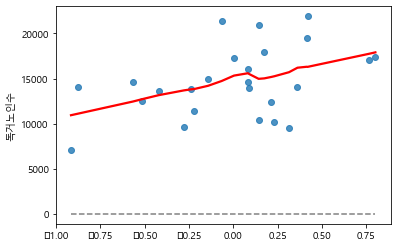

In [236]:
#선형성
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
fitted=model.predict()
residual = df['독거노인수']-fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


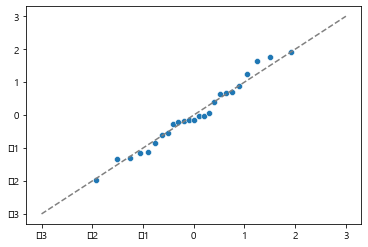

In [237]:
#정규성
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='독거노인수'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


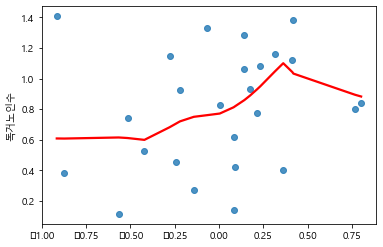

In [238]:
#등분산성
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)),lowess=True, line_kws={'color':'red'})

In [1]:
#복지
directory10='프로젝트 파일\\복지\\'

In [4]:
data=pd.read_csv(directory10+'2020_의료기관(구별).csv',encoding='cp949')
data2=pd.read_csv(directory10+'서울시 사회복지시설(노인의료복지시설) 목록 (1).csv',encoding='cp949')
data3=pd.read_csv(directory10+'서울시 사회복지시설(노인주거복지시설) 목록2.csv',encoding='cp949')
data4=pd.read_excel(directory10+'22년도노인교실현황_전처리.xlsx')
data5=pd.read_csv(directory10+'서울시 사회복지시설(재가노인복지시설) 목록.csv',encoding='cp949')
data6=pd.read_csv(directory10+'2020_서울시_장기요양기관_전문인력_현황.csv',encoding='cp949')

In [6]:
data4.rename(columns={'총시설수':'노인교실수'})
#의료기관
data['의료기관수']=data['종합병원']+data['병원']+data['의원']

In [7]:
#노인의료복지시설
data2=pd.DataFrame(data2['시군구명'].value_counts()).reset_index().sort_values(by='index').reset_index(drop=True).rename(columns={'index':'시군구명','시군구명':'노인의료복지시설수'})

In [343]:
#노인교실

In [8]:
#재가노인복지시설
data5=pd.DataFrame(data5['시군구명'].value_counts()).reset_index().sort_values(by='index').reset_index(drop=True).rename(columns={'index':'시군구명','시군구명':'재가노인복지시설수'})

In [9]:
#데이터 병합
data=data.sort_values(by='자치구별').reset_index(drop=True)[['자치구별','의료기관수']]
data3=data3.sort_values(by='행정구별').reset_index(drop=True)
data4=data4.sort_values(by='자치구별').reset_index(drop=True).rename(columns={'총시설수':'노인교실수'})
data5=data5
data6=data6.sort_values(by='자치구별').reset_index(drop=True)

In [10]:
df=pd.concat([data,data2,data3,data4,data5,data6],axis=1).drop(['자치구별','시군구명'],axis=1).set_index('행정구별')

In [11]:
cor1=df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8972\644547611.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(cor, dtype=np.bool)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


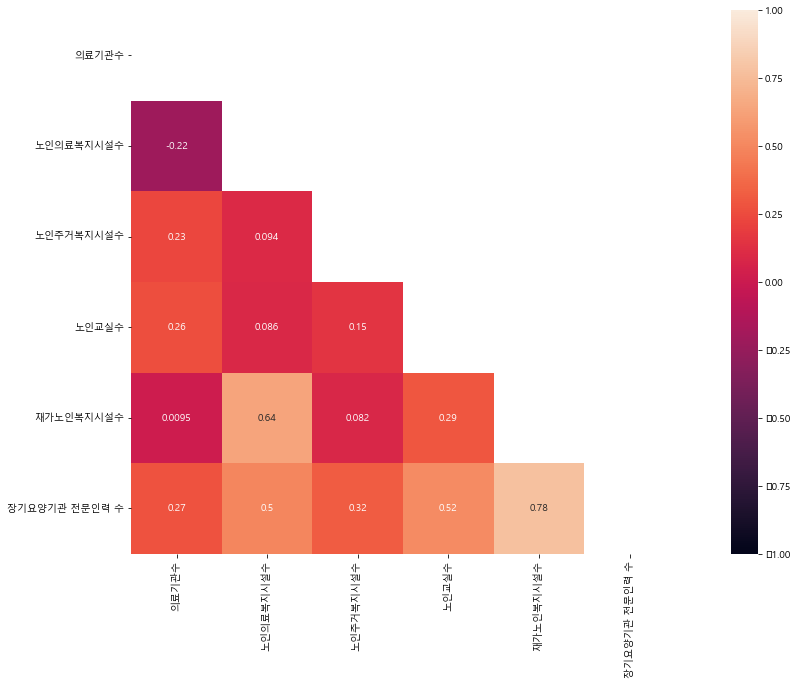

In [14]:
corhmap(cor1)

In [15]:
for i in df.columns:
    for j in df.columns:
        stat,pvalue=pearsonr(df[i],df[j])
        print(i,'와 ',j,'의 상관계수 :',stat )
        print(i,'와 ',j,'의 pvalue :',pvalue )
        print('\n')

NameError: name 'pearsonr' is not defined

In [17]:
std=StandardScaler()
scalerdata=pd.DataFrame(std.fit_transform(df),columns=df.columns,index=df.index)

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager,rc
import seaborn as sns

font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

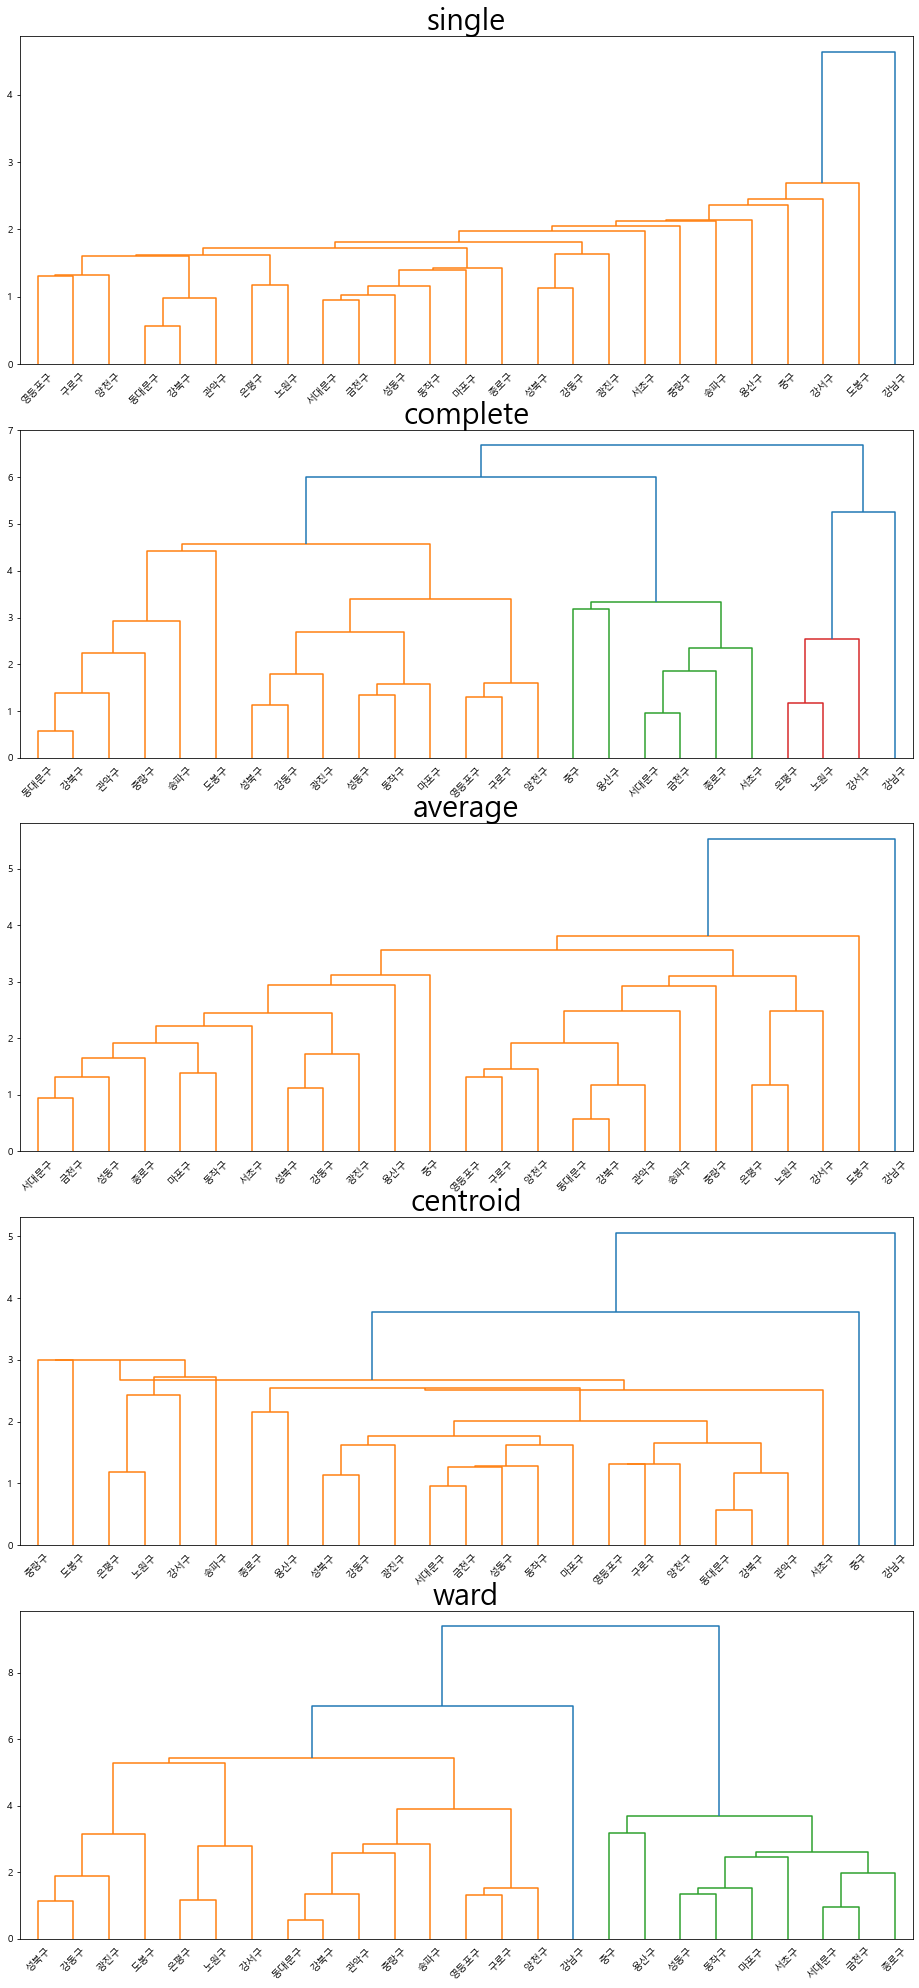

In [20]:
linkage_list=['single','complete','average','centroid','ward']
fig,axes=plt.subplots(nrows=len(linkage_list),ncols=1,figsize=(16,35))
for i in range(len(linkage_list)):
    linked=linkage(scalerdata,method=linkage_list[i])
    dn=dendrogram(linked, orientation='top',labels=scalerdata.index,distance_sort='descending',show_leaf_counts=True,ax=axes[i])
    axes[i].title.set_text(linkage_list[i])
    axes[i].title.set_size(30)
plt.show()

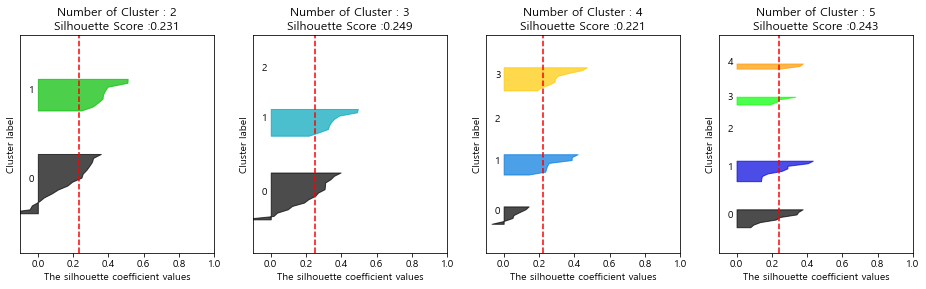

In [362]:
from sklearn.cluster import AgglomerativeClustering
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = AgglomerativeClustering(n_clusters = n_cluster, linkage='ward')
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성   

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], scalerdata)

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.p

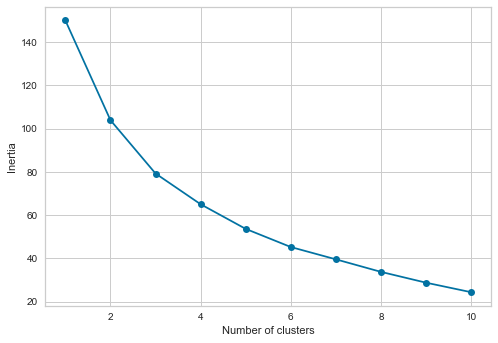

In [29]:
inertia=[]
for i in range(1,11):
    kmeans_plus=KMeans(n_clusters=i,init='k-means++')
    kmeans_plus.fit(scalerdata)
    inertia.append(kmeans_plus.inertia_)
    
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.p

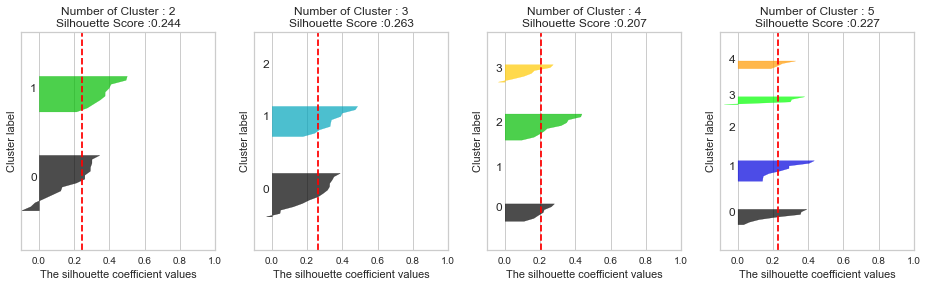

In [30]:
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster,init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성   

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], scalerdata)

In [21]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3,random_state=0)

In [22]:
label=kmean.fit_predict(scalerdata)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
scalerdata['cluster']=label

In [32]:
display(scalerdata[['행정구별','cluster']][scalerdata['cluster']==0])
display(scalerdata[['행정구별','cluster']][scalerdata['cluster']==1])
display(scalerdata[['행정구별','cluster']][scalerdata['cluster']==2])

,행정구별,cluster
5,광진구,0
7,금천구,0
11,동작구,0
12,마포구,0
13,서대문구,0
14,서초구,0
15,성동구,0
16,성북구,0
20,용산구,0
22,종로구,0


,행정구별,cluster
1,강동구,1
2,강북구,1
3,강서구,1
4,관악구,1
6,구로구,1
8,노원구,1
9,도봉구,1
10,동대문구,1
17,송파구,1
18,양천구,1


,행정구별,cluster
0,강남구,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


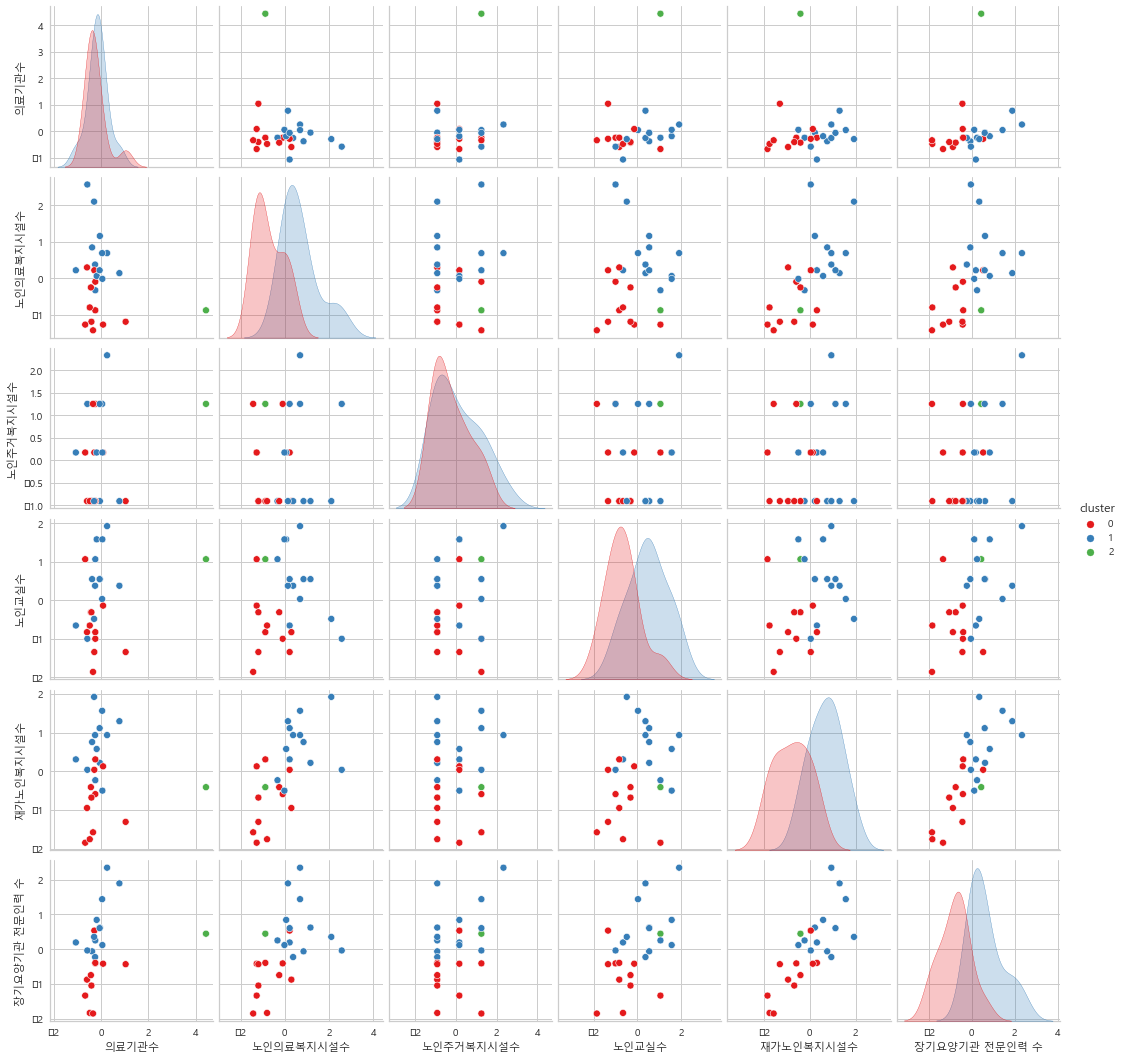

In [34]:
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
sns.pairplot(scalerdata,hue='cluster',palette='Set1')

## 의료기관수 노인의료복지 노인주거 노인교실 재가노인복지시설 장기요양기관 전문인력 수
### 0번군집 - 노인복지시설이 잘 갖춰지지 않은 곳 0.5 (광진구,금천구,동작구,마포구,서대문구,서초구,성동구,성북구,용산구,종로구,중구)
### 1,2번군집 - 노인복지시설이 잘 갖춰진 곳 1 (강남구,강동구,강북구,강서구,관악구,구로구,노원구,도봉구,동대문구,송파구,양천구,영등포구,은평구,중랑구)

In [27]:
def weight(x):
    div=0
    if x>=1:
        div=1
    else:
        False
    return div

scalerdata['weight']=scalerdata['cluster'].apply(lambda x:weight(x))
scalerdata=scalerdata.reset_index(drop=True)
#pd.concat([scalerdata['cluster'],weight],axis=1)
scalerdata

,index,행정구별,의료기관수,노인의료복지시설수,노인주거복지시설수,노인교실수,재가노인복지시설수,장기요양기관 전문인력 수,cluster,weight
0,0,강남구,4.440508,-0.879738,1.254953,1.065802,-0.405500,0.445538,2,1
1,1,강동구,-1.061598,0.219934,0.173097,-0.653233,0.312199,0.194081,1,1
2,2,강북구,-0.373835,0.848319,-0.908759,0.550091,0.760761,-0.061607,1,1
3,3,강서구,0.259293,0.691223,2.336809,1.925320,0.940186,2.341743,1,1
4,4,관악구,-0.046022,1.162511,-0.908759,0.550091,0.222487,0.622646,1,1
5,5,광진구,-0.238853,-0.094258,1.254953,-0.997041,-0.584925,-0.407361,0,0
6,6,구로구,-0.238853,-0.329902,-0.908759,1.065802,-0.226075,0.252110,1,1
7,7,금천구,-0.589162,0.298483,-0.908759,-0.825137,-0.943775,-0.873402,0,0
8,8,노원구,0.050393,0.691223,1.254953,0.034381,1.568173,1.437464,1,1
9,9,도봉구,-0.576307,2.576375,1.254953,-0.997041,0.043062,-0.036219,1,1


In [39]:
save=scalerdata[['행정구별','weight']]
save.to_csv('의료복지 지표.csv',encoding='cp949',index=False)

In [408]:
sol1=pd.read_csv("구역별 만족도 지표.csv",encoding='cp949')
sol2=pd.read_csv("구역별 일자리지수.csv",encoding='cp949')
sol3=pd.read_csv("구역별 연금지수.csv",encoding='cp949')
sol4=pd.read_csv("구역별 인구학적 특성.csv",encoding='cp949')

In [423]:
gu=sol1['GU']
jisu=sol1['satisfy']+sol2['일자리지수']+sol3['연금지수']+sol4['인구학적 특성지표']+scalerdata['weight']
final=pd.concat([gu,jisu],axis=1).rename(columns={0:'지수'})

In [425]:
final.to_csv("final.csv",encoding='cp949',index=False)

In [431]:
final.sort_values(by='지수',ascending=False).set_index('GU').head(5)

,지수
GU,
노원구,36.644282
양천구,35.085427
마포구,23.355785
동작구,21.318542
도봉구,20.819935


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data1=pd.read_csv("final2019.csv",encoding='cp949')
data2=pd.read_csv("final2020.csv",encoding='cp949')
data3=pd.read_csv("final.csv",encoding='cp949')

data1['year']=2019
data2['year']=2020
data3['year']=2021

In [30]:
a=data1.rename(columns={'지수':2019})
b=data2.rename(columns={'지수':2020})
c=data3.rename(columns={'지수':2021})

In [32]:
a[2019]=(-a[2019])
b[2020]=(-b[2020])
c[2021]=(-c[2021])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


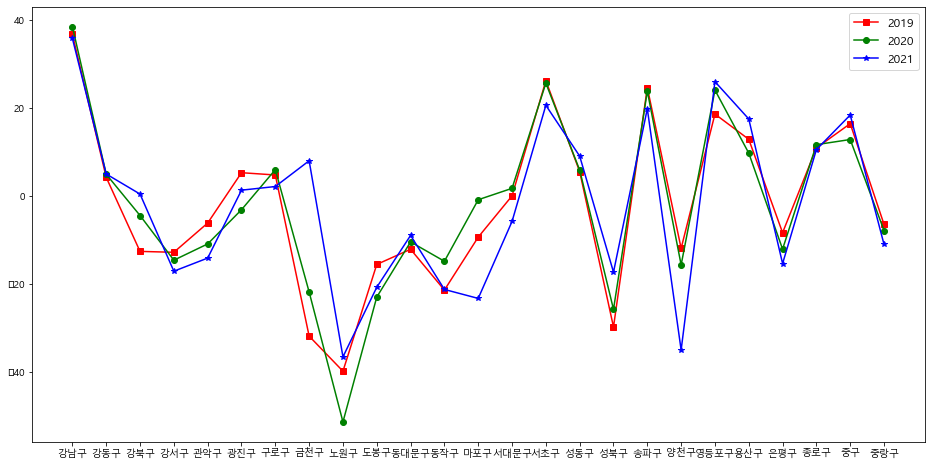

In [33]:
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.figure(figsize=(16,8))
plt.plot(a['GU'],a[2019],marker='s', color='r')
plt.plot(b['GU'],b[2020],marker='o', color='g')
plt.plot(c['GU'],c[2021],marker='*', color='b')
plt.legend([2019,2020,2021],fontsize=12, loc='best')